# Parkinson's Disease Total UPDRS Point Regression Analysis

## Introduction

In today's world, an aging population means that hospital staff are faced with an overwhelming amount of data, which makes it difficult for them to work efficiently and adds extra burden. Machine learning models can provide significant benefits to clinicians in this regard. The project I carried out below contains a series of audio recordings and data including various characteristics such as the patient's age and gender. Using this data, I performed a regression analysis and attempted to predict the **total UPDRS score** (a composite score used to assess the severity of Parkinson's disease symptoms, including both motor and non-motor aspects of the disease.) with high accuracy. Specifically, in the **RandomForest model**, I developed a highly consistent prediction model with an **RMSE of 0.364** and an **R² value of 0.99** on the test dataset.

**Description**

Oxford Parkinson's Disease Telemonitoring Dataset

**Source**

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in collaboration with 10 medical centers in the US and Intel Corporation who developed the telemonitoring device to record the speech signals. The original study used a range of linear and nonlinear regression methods to predict the clinician's Parkinson's disease symptom score on the UPDRS scale.

**Data Set Information**

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.
Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.
The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please contact Athanasios Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@' physics.ox.ac.uk).
Further details are contained in the following reference * if you use this dataset, please cite:Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',IEEE Transactions on Biomedical Engineering (to appear).
Further details about the biomedical voice measures can be found in:Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering, 56(4):1015-1022

**Attribute Information**


- **subject#** - Integer that uniquely identifies each subject
- **age** - Subject age
- **sex** - Subject gender '0' - male, '1' - female
- **test_time** - Time since recruitment into the trial. The integer part is the number of days since recruitment.
- **motor_UPDRS** - Clinician's motor UPDRS score, linearly interpolated
- **total_UPDRS** - Clinician's total UPDRS score, linearly interpolated
- **Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP** - Several measures of variation in fundamental frequency
- **Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA** - Several measures of variation in amplitude
- **NHR,HNR** - Two measures of ratio of noise to tonal components in the voice
- **RPDE** - A nonlinear dynamical complexity measure
- **DFA** - Signal fractal scaling exponent
- **PPE** - A nonlinear measure of fundamental frequency variation

**Relevant Papers**

Little MA, McSharry PE, Hunter EJ, Ramig LO (2009), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering, 56(4):1015-1022
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

**Citation Request**

If you use this dataset, please cite the following paper:A Tsanas, MA Little, PE McSharry, LO Ramig (2009)'Accurate telemonitoring of Parkinsonâ€™s disease progression by non-invasive speech tests',IEEE Transactions on Biomedical Engineering (to appear).

Source: http://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

*This machine learning model was developed using the dataset titled "Parkinson's Disease Progression" available on the Kaggle platform.* 

*The model was created by* **Çağatay Elik**.

You can access the dataset here:

__[Parkinson's Disease Progression](https://www.kaggle.com/datasets/thedevastator/unlocking-clues-to-parkinson-s-disease-progressi)__

## Importing Libraries and Data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("parkinsons_data.csv")

## Understanding Data

In [59]:
df.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [60]:
pd.set_option('display.max_columns', None)

In [61]:
df.head(10)

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,0.04352,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,0.00773,0.03610,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

There is no missing data and the data are all numeric values.

In [63]:
df.describe()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2937.000000,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,1696.110747,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,0.000000,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,1468.500000,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,2937.000000,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,4405.500000,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,5874.000000,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


The total UPDRS value ranges from 7 to about 55; the standard deviations of test time and HNR remain high compared to the min and max values, which may affect the performance of our regression models to some extent. 

In [64]:
total= df["total_UPDRS"]

In [65]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"Number of Unique Values in {column}: {unique_values}")

Number of Unique Values in index: 5875
Number of Unique Values in subject#: 42
Number of Unique Values in age: 23
Number of Unique Values in sex: 2
Number of Unique Values in test_time: 2442
Number of Unique Values in motor_UPDRS: 1080
Number of Unique Values in total_UPDRS: 1129
Number of Unique Values in Jitter(%): 1305
Number of Unique Values in Jitter(Abs): 4105
Number of Unique Values in Jitter:RAP: 853
Number of Unique Values in Jitter:PPQ5: 840
Number of Unique Values in Jitter:DDP: 1703
Number of Unique Values in Shimmer: 3581
Number of Unique Values in Shimmer(dB): 852
Number of Unique Values in Shimmer:APQ3: 2664
Number of Unique Values in Shimmer:APQ5: 2850
Number of Unique Values in Shimmer:APQ11: 3283
Number of Unique Values in Shimmer:DDA: 4223
Number of Unique Values in NHR: 5532
Number of Unique Values in HNR: 4780
Number of Unique Values in RPDE: 5430
Number of Unique Values in DFA: 5282
Number of Unique Values in PPE: 4777


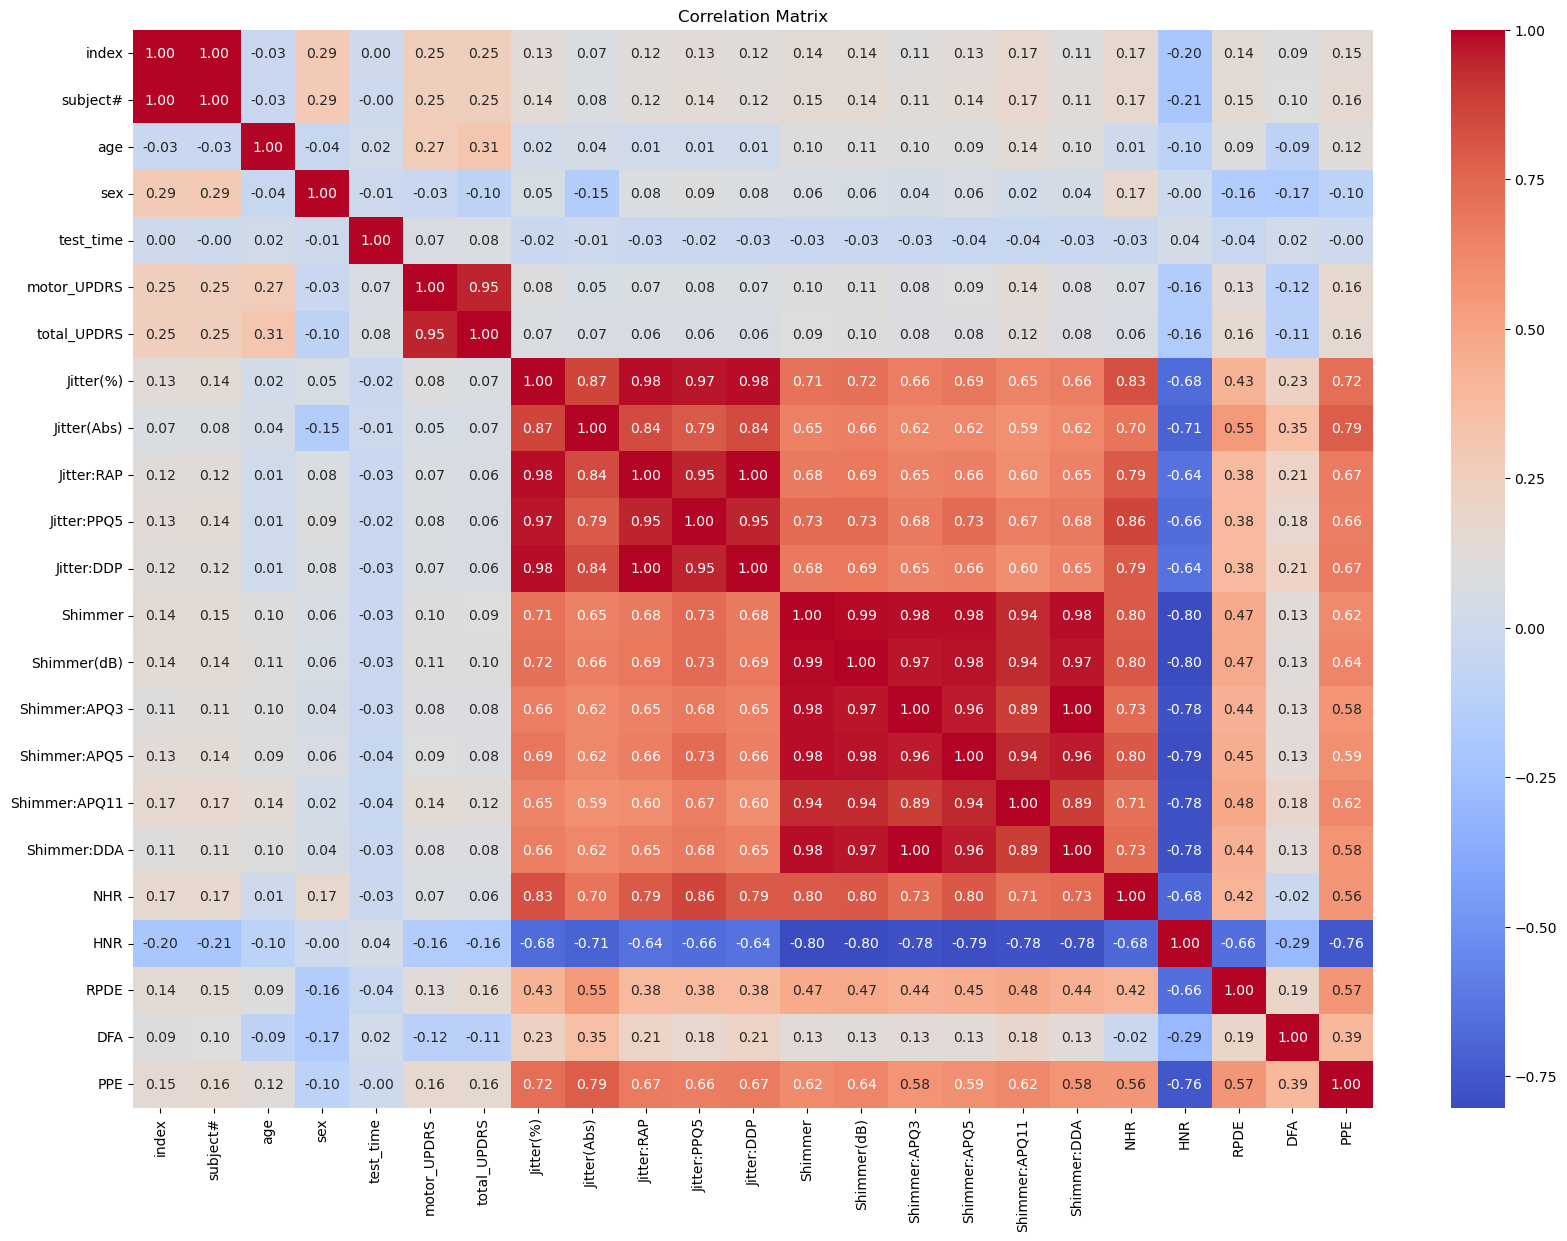

In [66]:
corr_matrix = df.corr()

plt.figure(figsize=(20,14))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Since some of the X variables are highly correlated, they could be removed depending on their impact on model performance. However, to minimize data loss, it is preferable to retain them at this stage.

In [67]:
df = df.drop(["index", "subject#"], axis = 1)

Unnecessary columns were deleted.

In [68]:
df.columns

Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

## Test/Train Split

In [69]:
X= df.drop("total_UPDRS", axis= 1)
y= df["total_UPDRS"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state= 42)

## Defining Models for Evaluation

In [70]:
def get_based_models():
    based_models = [
        ("LR", LinearRegression()),
        ("DT", DecisionTreeRegressor()),
        ("KN", KNeighborsRegressor()),
        ("AdaB", AdaBoostRegressor()),
        ("GBM", GradientBoostingRegressor()),
        ("RF", RandomForestRegressor()),
        ("SVM", SVR())
    ]
    return based_models

In [71]:
def evaluate_models(X_train, y_train, models):
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
                
        results.append(np.sqrt(-cv_results))  
        names.append(name)
                
        print(f"{name}: RMSE: {np.mean(np.sqrt(-cv_results)):.3f}, Std: {np.std(np.sqrt(-cv_results)):.3f}")
    
    return names, results

In [72]:
def train_and_predict(X_train, y_train, X_test, models):
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
                
        rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
        r2 = r2_score(y_train, model.predict(X_train))
        
        print(f"{name} - Train RMSE: {rmse:.3f}, R²: {r2:.3f}")
               
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        test_r2 = r2_score(y_test, y_pred)
        
        print(f"{name} - Test RMSE: {test_rmse:.3f}, Test R²: {test_r2:.3f}\n")

## Model Results

In [73]:
models = get_based_models()
names, results = evaluate_models(X_train, y_train, models)

LR: RMSE: 3.291, Std: 0.123
DT: RMSE: 0.644, Std: 0.066
KN: RMSE: 2.449, Std: 0.105
AdaB: RMSE: 2.866, Std: 0.052
GBM: RMSE: 1.515, Std: 0.046
RF: RMSE: 0.451, Std: 0.040
SVM: RMSE: 3.843, Std: 0.192


In [74]:
train_and_predict(X_train, y_train, X_test, models)

LR - Train RMSE: 3.275, R²: 0.907
LR - Test RMSE: 3.159, Test R²: 0.910

DT - Train RMSE: 0.000, R²: 1.000
DT - Test RMSE: 0.521, Test R²: 0.998

KN - Train RMSE: 1.523, R²: 0.980
KN - Test RMSE: 1.996, Test R²: 0.964

AdaB - Train RMSE: 3.002, R²: 0.922
AdaB - Test RMSE: 3.041, Test R²: 0.917

GBM - Train RMSE: 1.414, R²: 0.983
GBM - Test RMSE: 1.493, Test R²: 0.980

RF - Train RMSE: 0.160, R²: 1.000
RF - Test RMSE: 0.364, Test R²: 0.999

SVM - Train RMSE: 3.788, R²: 0.876
SVM - Test RMSE: 3.616, Test R²: 0.882



## Conclusion

In this study, various regression models were evaluated for their ability to predict the target variable accurately. Among all models, Random Forest (RF) and Gradient Boosting Machines (GBM) demonstrated the best performance, with low RMSE, high R² values, and strong generalization ability. While Decision Tree (DT) showed extremely high accuracy on the training set, it exhibited overfitting, making RF and GBM more reliable choices. K-Nearest Neighbors (KNN) provided moderate performance, but it was outperformed by ensemble models. On the other hand, Linear Regression (LR) and Support Vector Regression (SVM) struggled with high error rates, indicating that the dataset's complexity was not well captured by these methods. AdaBoost (AdaB) showed stable performance but was not competitive with RF or GBM. Based on these results, RF is the most suitable model due to its balance of accuracy, stability, and generalization, while GBM serves as a strong alternative. Future improvements could focus on hyperparameter tuning and feature engineering to further optimize performance.